#MIT 6.036 Spring 2019: Homework 3#

This colab notebook provides code and a framework for problems 1-7 of [the homework](https://openlearninglibrary.mit.edu/courses/course-v1:MITx+6.036+1T2019/courseware/Week3/week3_homework/).  You can work out your solutions here, then submit your results back on the homework page when ready.

## <section>**Setup**</section>

First, download the code distribution for this homework that contains test cases and helper functions.

Run the next code block to download and import the code for this lab.


In [1]:
!pwd

/Users/indrikwijaya/Documents/into-to-ml-assignments/code_and_data_for_hw3


In [2]:
#!rm -rf code_and_data_for_hw3*
#!rm -rf mnist
#!wget --quiet https://introml_oll.odl.mit.edu/6.036/static/homework/hw03/code_and_data_for_hw3.zip
!ls
#!unzip code_and_data_for_hw3.zip
#!mv code_and_data_for_hw3/* .
!mkdir mnist
!mv mnist* mnist/
!ls
from code_for_hw3_part1 import *
import code_for_hw3_part2 as hw3

MIT6_036_hw03_colab_notebook.ipynb hw3_part2_main.py
__pycache__                        mnist
auto-mpg.tsv                       reviews.tsv
code_for_hw3_part1.py              stopwords.txt
code_for_hw3_part2.py
mkdir: mnist: File exists
mv: rename mnist to mnist/mnist: Invalid argument
MIT6_036_hw03_colab_notebook.ipynb hw3_part2_main.py
__pycache__                        mnist
auto-mpg.tsv                       reviews.tsv
code_for_hw3_part1.py              stopwords.txt
code_for_hw3_part2.py
Importing code_for_hw03
Imported tidy_plot, plot_separator, plot_data, plot_nonlin_sep, cv, rv, y, positive, score
Datasets: super_simple_separable_through_origin(), super_simple_separable(), xor(), xor_more()
Tests for part 2: test_linear_classifier_with_features, mul, make_polynomial_feature_fun, 
                  test_with_features
Also loaded: perceptron, one_hot_internal, test_one_hot
Importing code_for_hw03 (part 2, imported as hw3)
Imported tidy_plot, plot_separator, plot_data, plot_nonl

In [3]:
help(tidy_plot)

Help on function tidy_plot in module code_for_hw3_part1:

tidy_plot(xmin, xmax, ymin, ymax, center=False, title=None, xlabel=None, ylabel=None)



# Feature Transformation

## <section>**Running Perceptron**</section>

In problems 1,2 and 3, you will have to run the Perceptron algorithm several times to obtain linear classifiers.
We provide you with an implementation of the algorithm which you can use to obtain your results.

The specifications for the `perceptron`method provided are:
* `data` is a numpy array of dimension $d$ by $n$
* `labels` is numpy array of dimension $1$ by $n$
* `params` is a dictionary specifying extra parameters to this algorithm; your algorithm runs a number of iterations equal to $T$
* `hook` is either None or a function that takes the tuple `(th, th0)` as an argument and displays the separator graphically. 

It should return a tuple of $\theta$ (a $d$ by 1 array) and $\theta_0$ (a 1 by 1 array).

Note that you are free to modify the method. For example, a useful modification for this homework would be to make the method return the number of mistakes made on the input data, while it runs.

In [4]:
# Perceptron algorithm with offset.
# data is dimension d by n
# labels is dimension 1 by n
# T is a positive integer number of steps to run
def perceptron(data, labels, params = {}, hook = None):
    # if T not in params, default to 100
    T = params.get('T', 50)
    (d, n) = data.shape

    theta = np.zeros((d, 1)); theta_0 = np.zeros((1, 1))
    for t in range(T):
        for i in range(n):
            x = data[:,i:i+1]
            y = labels[:,i:i+1]
            if y * positive(x, theta, theta_0) <= 0.0:
                theta = theta + y * x
                theta_0 = theta_0 + y
                if hook: hook((theta, theta_0))
    return theta, theta_0

def averaged_perceptron(data, labels, params = {}, hook = None):
    T = params.get('T', 50)
    (d, n) = data.shape

    theta = np.zeros((d, 1)); theta_0 = np.zeros((1, 1))
    theta_sum = theta.copy()
    theta_0_sum = theta_0.copy()
    for t in range(T):
        for i in range(n):
            x = data[:,i:i+1]
            y = labels[:,i:i+1]
            if y * positive(x, theta, theta_0) <= 0.0:
                theta = theta + y * x
                theta_0 = theta_0 + y
                if hook: hook((theta, theta_0))
            theta_sum = theta_sum + theta
            theta_0_sum = theta_0_sum + theta_0
    theta_avg = theta_sum / (T*n)
    theta_0_avg = theta_0_sum / (T*n)
    if hook: hook((theta_avg, theta_0_avg))
    return theta_avg, theta_0_avg

  
def eval_classifier(learner, data_train, labels_train, data_test, labels_test):
    th, th0 = learner(data_train, labels_train)
    return score(data_test, labels_test, th, th0)/data_test.shape[1]

def positive(x, th, th0):
    return np.sign(th.T@x + th0)

def score(data, labels, th, th0):
    return np.sum(positive(data, th, th0) == labels)

def xval_learning_alg(learner, data, labels, k):
    _, n = data.shape
    idx = list(range(n))
    np.random.seed(0)
    np.random.shuffle(idx)
    data, labels = data[:,idx], labels[:,idx]

    score_sum = 0
    s_data = np.array_split(data, k, axis=1)
    s_labels = np.array_split(labels, k, axis=1)
    for i in range(k):
        data_train = np.concatenate(s_data[:i] + s_data[i+1:], axis=1)
        labels_train = np.concatenate(s_labels[:i] + s_labels[i+1:], axis=1)
        data_test = np.array(s_data[i])
        labels_test = np.array(s_labels[i])
        score_sum += eval_classifier(learner, data_train, labels_train,
                                              data_test, labels_test)
    return score_sum/k

In [5]:
theta_list = []
theta0_list = []

for datafn in (super_simple_separable_through_origin, super_simple_separable):
  data, labels = datafn()
  theta, theta0 = perceptron(data, labels, params = {'T':100}, hook = None)
  theta_list.append(theta)
  theta0_list.append(theta0)
print(theta_list, theta0_list)

[array([[-9.],
       [18.]]), array([[-24.],
       [ 37.]])] [array([[2.]]), array([[-3.]])]


In [6]:
# Qn 1
data = ([[200, 800, 200, 800],
             [0.2,  0.2,  0.8,  0.8]])
labels = [[-1, -1, 1, 1]]

# 1a)
theta = np.array([0, 1, -0.5])

def get_margin(data, labels, theta):
  data_add_1 = np.vstack([data, [[1, 1, 1, 1]]])
  
  hypo = np.dot(theta.T, data_add_1)

  margin = min(np.multiply(labels, hypo)/np.linalg.norm(theta))
  if len(margin) > 0 :
    margin = margin[0]
  return margin

print("margin: ", get_margin(data, labels, theta))

margin:  0.2683281572999747


In [7]:
# 1b)
def get_max_bounds(data, labels, theta):
    data_add_1 = np.vstack([data, [[1, 1, 1, 1]]])
    margin = get_margin(data, labels, theta)
    possible_bounds = (np.linalg.norm(data_add_1, axis=0)/margin)**2
    max_bounds = max(possible_bounds)
    return max_bounds
print('maximum theoretical bounds: ', get_max_bounds(data, labels, theta))

# 1c)
def get_mistakes(data, labels, theta):
    max_bounds = get_max_bounds(data, labels, theta)
    T = int(max_bounds)
    (d, n) = np.array(data).shape
    
    theta = np.zeros((d, 1)); theta_0 = np.zeros((1, 1))
    mistakes = 0
    for t in range(T):
        for i in range(n):
            x = np.array(data)[:,i:i+1]
            y = np.array(labels)[:,i:i+1]
            if y * positive(x, theta, theta_0) <= 0.0:
                theta = theta + y * x
                theta_0 = theta_0 + y
    return mistakes
print('no of mistakes: ', get_mistakes(data, labels, theta))

maximum theoretical bounds:  8888911.666666672


KeyboardInterrupt: 

In [8]:
# 1d)
data = ([[200, 800, 200, 800],
             [0.2,  0.2,  0.8,  0.8]])
data_new = np.array(data)*0.001
labels = [[-1, -1, 1, 1]]

theta_new = np.array([0, 1, -0.0005])
print('margin: ', get_margin(data_new, labels, theta_new))

# 1e)
get_mistakes(data_new, labels, theta_new)

margin:  0.00029999996250000706


KeyboardInterrupt: 

In [9]:
# 1f)
data_array = np.array(data)
data_new = np.multiply(data_array, np.array([0.001, 1]).reshape(-1, 1))
print('margin: ', get_margin(data_new, labels, theta))

margin:  0.2683281572999747


In [113]:
# 1g)
print('maximum theoretical bounds: ', get_max_bounds(data_new, labels, theta))

# 1h)
print('no of mistakes: ', get_mistakes(data_new, labels, theta))

maximum theoretical bounds:  31.666666666666686
no of mistakes:  0


In [10]:
margin = get_margin(data_new, labels, theta)
possible_bounds = (np.linalg.norm(data_new, axis=0)/margin)**2
max_bounds = max(possible_bounds)
possible_bounds

array([ 1.11111111,  9.44444444,  9.44444444, 17.77777778])

## <section>2D) Encoding Discrete Values</section>

It is common to encode sets of discrete values, for machine learning, not as a single multi-valued feature, but using a one hot encoding. So, if there are $k$ values in the discrete set, we would transform that single multi-valued feature into $k$ binary-valued features, in which feature $i$ has value $+1$ if the original feature value was $i$ and has value $0$ (or $-1$) otherwise.

Write a function `one_hot` that takes as input $x$, a single feature value (between $1$ and $k$), and $k$, the total possible number of values this feature can take on, and transform it to a numpy column vector of $k$ binary features using a one-hot encoding (remember vectors have zero-based indexing).

In [11]:
# Qn 2
data = rv([2, 3, 4, 5])
labels = rv([1, 1, -1, -1])

# 2a)
theta, theta0 = perceptron(data, labels)
print(theta, theta0)

# 2b)
test = [[1,6]]
np.sign(theta.T@np.array(test) + theta0)

[[-2.]] [[7.]]


array([[ 1., -1.]])

In [12]:
# 2d)
def one_hot(x, k):
    # Your implementation here
    vect = cv([0]*k)
    vect[x-1, 0] = 1
    return vect

In [13]:
test_one_hot(one_hot)

Passed! 



In [14]:
# 2ei)
def one_hot_encode(data):
  data_flat = [i for j in data for i in j]
  data_one_hot = []
  for i in data_flat:
    data_one_hot.append(one_hot(i, 6))
  return np.array(data_one_hot).flatten().reshape(len(data_flat), 6).T

data_one_hot = one_hot_encode(data)
theta_update, theta0_update = perceptron(data_one_hot, labels)
print(theta_update, theta0_update)

#2eii) 
test_one_hot = one_hot_encode(test)
predict = np.sign(theta_update.T@test_one_hot + theta0_update)
print(predict)

#2eiii)
hypo = (theta_update.T@test_one_hot + theta0_update)/np.linalg.norm(np.stack(theta_update, theta0_update))

margin = np.multiply(predict, hypo)/np.linalg.norm(theta)
margin

[[ 0.]
 [ 2.]
 [ 1.]
 [-2.]
 [-1.]
 [ 0.]] [[0.]]
[[0. 0.]]


array([[0., 0.]])

In [15]:
# 2f)
data =   rv([1, 2, 3, 4, 5, 6])
labels = rv([1, 1, -1, -1, 1, 1])
theta, theta0 = perceptron(one_hot_encode(data), labels)
print(theta, theta0)

[[ 1.]
 [ 1.]
 [-2.]
 [-2.]
 [ 1.]
 [ 1.]] [[0.]]


## 3) Polynomial Features

One systematic way of generating non-linear transformations of your input features is to consider the polynomials of increasing order.  Given a feature vector $x = [x_1, x_2, ..., x_d]^T$, we can map it into a new feature vector that contains all the factors in a polynomial of order $d$. For example, for $x = [x_1, x_2]^T$ and order 2, we get $$\phi(x) = [1, x_1, x_2, x_1x_2, x_1^2, x_2^2]^T$$ and for order 3, we get $$\phi(x) = [1, x_1, x_2, x_1x_2, x_1^2, x_2^2, x_1^2x_2, x_1x_2^2, x_1^3, x_2^3]^T.$$  

In the code that has been loaded, we have defined `make_polynomial_feature_fun` that, given the order, returns a feature transformation function (analogous to $\phi$ in the description).  You should use it in doing this problem.

In [16]:
## For example, make_polynomial_feature_fun could be used as follows:
import numpy as np

# Data
data = np.zeros((2,1))

# Generate transformation of order 2
transformation = make_polynomial_feature_fun(4)

# Use transformation on data
print(transformation(data))
len(transformation(data))

[[1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


15

In [17]:
#3a)
print(2*3/2, 11*12/2, 21*22/2, 31*32/2, 41*42/2, 51*52/2)

3.0 66.0 231.0 496.0 861.0 1326.0


Note that iterative animations, which update a plot within a loop, don't work the same way in colab, as with a local python console installation.  One workaround for colab to be able to show such plot iterations is to show all the plots, and this can be done for the test code using this patched function:

In [18]:
def test_linear_classifier_with_features(dataFun, learner, feature_fun,
                             draw = True, refresh = True, pause = True):
    raw_data, labels = dataFun()
    data = feature_fun(raw_data) if feature_fun else raw_data
    if draw:
        def hook(params):
            ax = plot_data(raw_data, labels)   # create plot axis on each iteration
            (th, th0) = params
            predictor = lambda x1,x2: int(positive(feature_fun(cv([x1, x2])), th, th0))
            plot_nonlin_sep(
                predictor,
                ax = ax)
            plot_data(raw_data, labels, ax)
            plt.show()                         # force plot to push to the colab notebook and be displayed
            print('th', th.T, 'th0', th0)
            if pause: input('press enter here to continue:')
    else:
        hook = None
    th, th0 = learner(data, labels, hook = hook)
    if hook: hook((th, th0))
    print("Final score", int(score(data, labels, th, th0)))
    print("Params", np.transpose(th), th0)

def test_with_features(dataFun, order = 2, draw=True, pause=True):
    test_linear_classifier_with_features(
        dataFun,                        # data
        perceptron,                     # learner
        make_polynomial_feature_fun(order), # feature maker
        draw=draw,
        pause=pause)
  
#3b) 
data = rv([[1, 1, 2, 2],
         [1, 2, 1, 2]])
labels = rv([-1, 1, 1, -1])

Here's a test you can run to see plots:

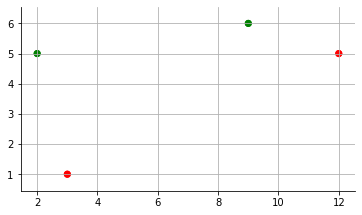

th [[1. 2. 5.]] th0 [[1.]]


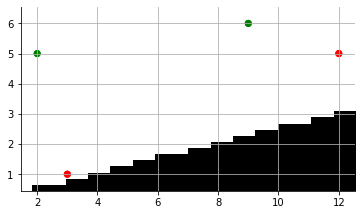

th [[ 0. -1.  4.]] th0 [[0.]]


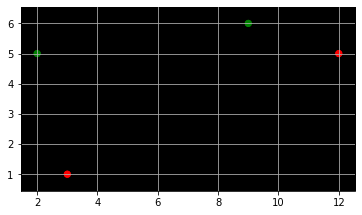

th [[ -1. -13.  -1.]] th0 [[-1.]]


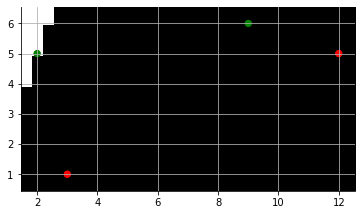

th [[  0. -11.   4.]] th0 [[0.]]


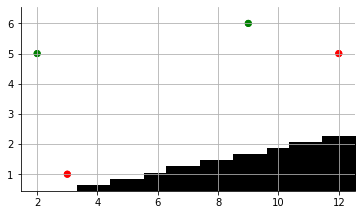

th [[ 1. -2. 10.]] th0 [[1.]]


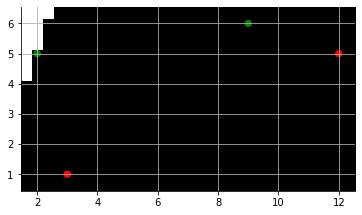

th [[  0. -14.   5.]] th0 [[0.]]


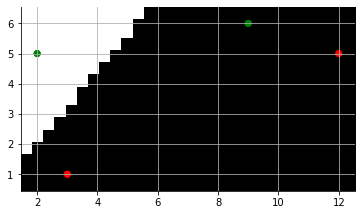

th [[  1. -12.  10.]] th0 [[1.]]


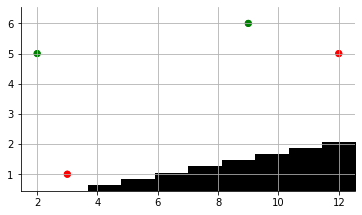

th [[ 2. -3. 16.]] th0 [[2.]]


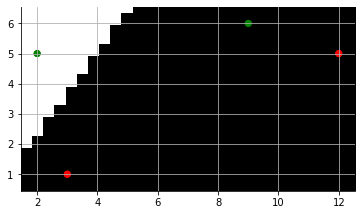

th [[  1. -15.  11.]] th0 [[1.]]


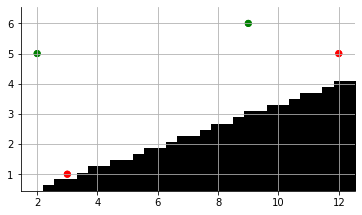

th [[ 2. -6. 17.]] th0 [[2.]]


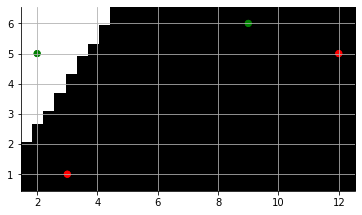

th [[  1. -18.  12.]] th0 [[1.]]


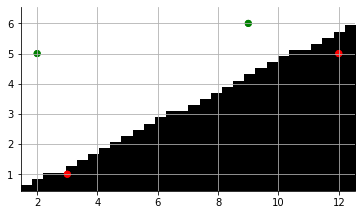

th [[ 2. -9. 18.]] th0 [[2.]]


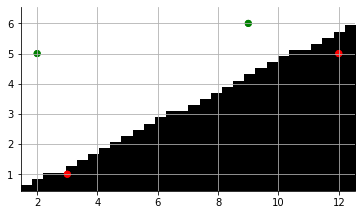

th [[ 2. -9. 18.]] th0 [[2.]]
Final score 4
Params [[ 2. -9. 18.]] [[2.]]


In [190]:
# super_simple_separable_through_origin
test_with_features(super_simple_separable_through_origin, order=1, draw=True, pause=False)

In [ ]:
test_with_features(super_simple_separable, order = 1, draw = True, pause = False)

We know that a better way to do this exists (eg using [colab plot animations](https://colab.research.google.com/drive/131wXGA8h8d7llSZxZJ6R4e8nz0ih1WPG#scrollTo=5zVG8JcR4CS2)) - if you are willing to contribute some nice code which lets our plotting functions do this, please do share!

In [ ]:
test_with_features(xor, order = 2, draw = True, pause = False)

In [ ]:
test_with_features(xor_more, order = 3, draw = True, pause = False)

# Experiments

## 4) Evaluating algorithmic and feature choices for AUTO data

We now want to build a classifier for the auto data, focusing on the
numeric data.  In the code file for this part of the assignment, we have supplied you
with the `load_auto_data` function, that can be used to read the
relevant .tsv file.  It will return a list of dictionaries, one for each data item.

We then have to specify what feature function to use for each column
in the data.  The file `hw3_part2_main.py` has an example for constructing
the data and label arrays using `raw` feature function for all the columns.
Look at the definition of `features` in `hw3_part2_main.py`, this indicates a feature name to
use and then a feature function, there are three defined in the
`code_for_hw3_part2.py` file (`raw`, `standard` and `one_hot`).  `raw` just uses
the original value, `standard` subtracts out the mean value and
divides by the standard deviation and `one_hot` does the encoding
described in the notes.

The function `auto_data_and_labels` will process the dictionaries and
return <tt>data, labels</tt> where <tt>data</tt> are arrays of
dimension $(d, 392)$, with $d$ the total number of features specified,
and <tt>labels</tt> is of dimension $(1, 392)$.  The data in the file
is sorted by class, but it will be shuffled when you read it in.

In [19]:
# Returns a list of dictionaries.  Keys are the column names, including mpg.
auto_data_all = hw3.load_auto_data('auto-mpg.tsv')

# The choice of feature processing for each feature, mpg is always raw and
# does not need to be specified.  Other choices are hw3.standard and hw3.one_hot.
# 'name' is not numeric and would need a different encoding.
features_1 = [('cylinders', hw3.raw),
            ('displacement', hw3.raw),
            ('horsepower', hw3.raw),
            ('weight', hw3.raw),
            ('acceleration', hw3.raw),
            ## Drop model_year by default
            ## ('model_year', hw3.raw),
            ('origin', hw3.raw)]

features_2 = [('cylinders', hw3.one_hot),
            ('displacement', hw3.standard),
            ('horsepower', hw3.standard),
            ('weight', hw3.standard),
            ('acceleration', hw3.standard),
            ## Drop model_year by default
            ## ('model_year', hw3.raw),
            ('origin', hw3.one_hot)]

# Construct the standard data and label arrays
auto_data_1, auto_labels_1 = hw3.auto_data_and_labels(auto_data_all, features_1)
print('auto data and labels shape', auto_data_1.shape, auto_labels_1.shape)
auto_data_2, auto_labels_2 = hw3.auto_data_and_labels(auto_data_all, features_2)
print('auto data and labels shape', auto_data_2.shape, auto_labels_2.shape)

avg and std {}
entries in one_hot field {}
auto data and labels shape (6, 392) (1, 392)
avg and std {'displacement': (388.3482142857143, 302.0458123396403), 'horsepower': (509.3545918367347, 333.6521151716361), 'weight': (2977.5841836734694, 848.3184465698365), 'acceleration': (15.541326530612228, 2.7553429127509963)}
entries in one_hot field {'cylinders': [3.0, 4.0, 5.0, 6.0, 8.0], 'origin': [1.0, 2.0, 3.0]}
auto data and labels shape (12, 392) (1, 392)


In [20]:
features_2

[('cylinders', <function code_for_hw3_part2.one_hot>),
 ('displacement', <function code_for_hw3_part2.standard>),
 ('horsepower', <function code_for_hw3_part2.standard>),
 ('weight', <function code_for_hw3_part2.standard>),
 ('acceleration', <function code_for_hw3_part2.standard>),
 ('origin', <function code_for_hw3_part2.one_hot>)]

Feature 0 cylinders


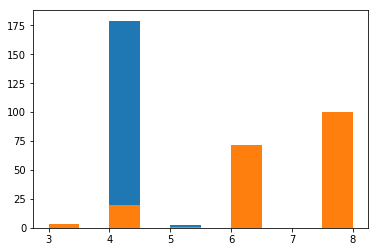

Feature 1 displacement


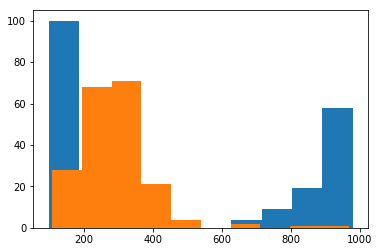

Feature 2 horsepower


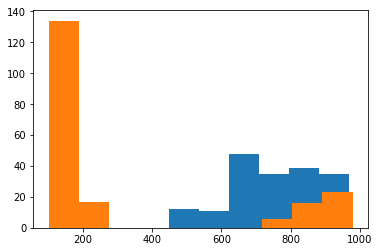

Feature 3 weight


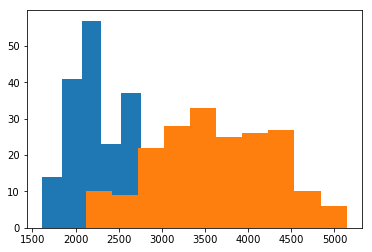

Feature 4 acceleration


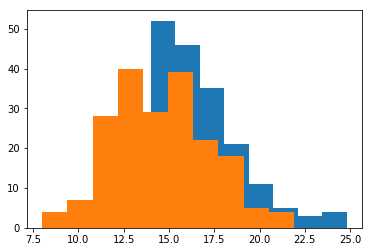

Feature 5 origin


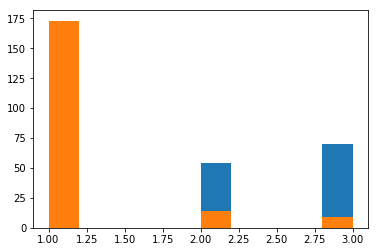

In [25]:
import matplotlib.pyplot as plt
for feat in range(auto_data_1.shape[0]):
    print('Feature', feat, features_1[feat][0])
    # Plot histograms in one window, different colors
    plt.hist(auto_data_1[feat, auto_labels_1[0,:] > 0])
    plt.hist(auto_data_1[feat, auto_labels_1[0,:] < 0])
    plt.show()
    # Plot histograms in two windows, different colors
    # fig,(a1,a2) = plt.subplots(nrows=2)
    # a1.hist(auto_data[feat,auto_labels[0,:] > 0])
    # a2.hist(auto_data[feat,auto_labels[0,:] < 0])
    # plt.show()

In [26]:
def eval_classifier(learner, data_train, labels_train, data_test, labels_test, T):
    th, th0 = learner(data_train, labels_train, params = {'T': T})
    return score(data_test, labels_test, th, th0)/data_test.shape[1]

def xval_learning_alg(learner, data, labels, k, T):
    _, n = data.shape
    idx = list(range(n))
    np.random.seed(0)
    np.random.shuffle(idx)
    data, labels = data[:,idx], labels[:,idx]

    s_data = np.array_split(data, k, axis=1)
    s_labels = np.array_split(labels, k, axis=1)

    score_sum = 0
    for i in range(k):
        data_train = np.concatenate(s_data[:i] + s_data[i+1:], axis=1)
        labels_train = np.concatenate(s_labels[:i] + s_labels[i+1:], axis=1)
        data_test = np.array(s_data[i])
        labels_test = np.array(s_labels[i])
        score_sum += eval_classifier(learner, data_train, labels_train,
                                              data_test, labels_test, T)
    return score_sum/k

#4.1c i) features 1, T = 1
print('perceptron accuracy: ', xval_learning_alg(perceptron, auto_data_1, auto_labels_1, 10, 1))
print('ave perceptron accuracy: ', xval_learning_alg(averaged_perceptron, auto_data_1, auto_labels_1, 10, 1))

#4.1c ii) features 2, T = 1
print('perceptron accuracy: ', xval_learning_alg(perceptron, auto_data_2, auto_labels_2, 10, 1))
print('ave perceptron accuracy: ', xval_learning_alg(averaged_perceptron, auto_data_2, auto_labels_2, 10, 1))

perceptron accuracy:  0.6526282051282052
ave perceptron accuracy:  0.8441025641025641
perceptron accuracy:  0.7908333333333333
ave perceptron accuracy:  0.9004487179487182


In [27]:
#4.1c iii) features 1, T = 10
print('perceptron accuracy: ', xval_learning_alg(perceptron, auto_data_1, auto_labels_1, 10, 10))
print('ave perceptron accuracy: ', xval_learning_alg(averaged_perceptron, auto_data_1, auto_labels_1, 10, 10))

#4.1c iv) features 2, T = 10
print('perceptron accuracy: ', xval_learning_alg(perceptron, auto_data_2, auto_labels_2, 10, 10))
print('ave perceptron accuracy: ', xval_learning_alg(averaged_perceptron, auto_data_2, auto_labels_2, 10, 10))

perceptron accuracy:  0.7423076923076924
ave perceptron accuracy:  0.8366025641025641
perceptron accuracy:  0.8061538461538461
ave perceptron accuracy:  0.8979487179487181


In [28]:
#4.1c v) features 1, T = 50
print('perceptron accuracy: ', xval_learning_alg(perceptron, auto_data_1, auto_labels_1, 10, 50))
print('ave perceptron accuracy: ', xval_learning_alg(averaged_perceptron, auto_data_1, auto_labels_1, 10, 50))

#4.1c vi) features 2, T = 50
print('perceptron accuracy: ', xval_learning_alg(perceptron, auto_data_2, auto_labels_2, 10, 50))
print('ave perceptron accuracy: ', xval_learning_alg(averaged_perceptron, auto_data_2, auto_labels_2, 10, 50))

perceptron accuracy:  0.6909615384615384
ave perceptron accuracy:  0.8366025641025641
perceptron accuracy:  0.8060256410256409
ave perceptron accuracy:  0.9005128205128207


In [29]:
theta_best, theta0_best = averaged_perceptron(auto_data_2, auto_labels_2, params = {'T':10})
print(theta_best, theta0_best)

[[-0.92168367]
 [ 1.50280612]
 [ 0.40229592]
 [-0.7630102 ]
 [ 0.73903061]
 [-1.17833746]
 [ 0.45228459]
 [-4.91225636]
 [ 0.45783691]
 [ 0.27806122]
 [ 0.97091837]
 [-0.28954082]] [[0.95943878]]


## 5) Evaluating algorithmic and feature choices for review data

We have supplied you with the `load_review_data`
function, that can be used to read a .tsv file and return the labels
and texts. We have also supplied you with the `bag_of_words` function,
which takes the raw data and returns a dictionary of unigram
words. The resulting dictionary is an input to
`extract_bow_feature_vectors` which computes a feature matrix of ones
and zeros that can be used as the input for the classification
algorithms.  The file `hw3_part2_main.py` has code for constructing
the data and label arrays.  Using these arrays and our implementation
of the learning algorithms, you will be able to compute $\theta$ and
$\theta_0$.  You will need to add your (or the one written by staff)
implementation of perceptron and averaged perceptron.

In [30]:
# Returns lists of dictionaries.  Keys are the column names, 'sentiment' and 'text'.
# The train data has 10,000 examples
review_data = hw3.load_review_data('reviews.tsv')

# Lists texts of reviews and list of labels (1 or -1)
review_texts, review_label_list = zip(*((sample['text'], sample['sentiment']) for sample in review_data))

# The dictionary of all the words for "bag of words"
dictionary = hw3.bag_of_words(review_texts)

# The standard data arrays for the bag of words
review_bow_data = hw3.extract_bow_feature_vectors(review_texts, dictionary)
review_labels = hw3.rv(review_label_list)
print('review_bow_data and labels shape', review_bow_data.shape, review_labels.shape)

review_bow_data and labels shape (19945, 10000) (1, 10000)


In [31]:
T5_p = xval_learning_alg(perceptron, review_bow_data, review_labels, 10, 1)
T5_a = xval_learning_alg(averaged_perceptron, review_bow_data, review_labels, 10, 1)

T10_P = xval_learning_alg(perceptron, review_bow_data, review_labels, 10, 10)
T10_a = xval_learning_alg(averaged_perceptron, review_bow_data, review_labels, 10, 10)

T50_P = xval_learning_alg(perceptron, review_bow_data, review_labels, 10, 50)
T50_a = xval_learning_alg(averaged_perceptron, review_bow_data, review_labels, 10, 50)

print(T5_p, T5_a)
print(T10_P, T10_a)
print(T50_P, T50_a)

0.7672000000000001 0.8120999999999998
0.7871 0.8237
0.8036 0.8157


In [32]:
theta, theta0 = averaged_perceptron(review_bow_data, review_labels, params = {'T':10})

In [35]:
idx_word = hw3.reverse_dict(dictionary)
#5.2A) find top 10 most +ve words
theta_list = [i[0] for i in theta.tolist()]
top_10_idx = sorted(range(len(theta_list)), key = lambda i: theta_list[i])[-10:]

print("Top 10 most +ve words: ", [idx_word[idx] for idx in top_10_idx])

#5.2B) find 10 most -ve words
bottom_10_idx = sorted(range(len(theta_list)), key = lambda i: theta_list[i], reverse = True)[-10:]
print("Top 10 most -ve words: ", [idx_word[idx] for idx in bottom_10_idx])

Top 10 most +ve words:  ['great', 'individually', 'bright', 'yummy', 'skeptical', 'perfect', 'easily', 'satisfied', 'delicious', 'excellent']
Top 10 most -ve words:  ['formula', 'poor', 'bland', 'disappointment', 'changed', 'stuck', 'horrible', 'unfortunately', 'awful', 'worst']


## 6) Evaluating features for MNIST data


This problem explores how well the perceptron algorithm works to <a
href="http://neuralnetworksanddeeplearning.com/chap1.html">classify
images of handwritten digits</a>, from the well-known ("MNIST")
dataset, buiding on your thoughts from lab about extracting features
from images.  This exercise will highlight how important feature
extraction is, before linear classification is done, using algorithms
such as the perceptron.

<b>Dataset setup</b>

Often, it may be easier to work with a vector whose spatial orientation is preserved.
In previous parts, we have represented features as one long feature vector.
For images, however, we often represent a $m$ by $n$ image
as a `(m,n)` array, rather than a `(mn,1)` array
(as the previous parts have done).

In the code file, we have supplied you with the `load_mnist_data` function,
which will read from the provided image files and populate a dictionary,
with image and label vectors for each numerical digit from 0 to 9.
These images are already shaped as `(m,n)` arrays.

In [39]:
mnist_data_all = hw3.load_mnist_data(range(10))

print('mnist_data_all loaded. shape of single images is', mnist_data_all[0]["images"][0].shape)

def get_two_images(image_0, image_1):
    # HINT: change the [0] and [1] if you want to access different images
    d0 = mnist_data_all[image_0]["images"]
    d1 = mnist_data_all[image_1]["images"]
    y0 = np.repeat(-1, len(d0)).reshape(1,-1)
    y1 = np.repeat(1, len(d1)).reshape(1,-1)
#     y0 = mnist_data_all[image_0]["labels"]
#     y1 = mnist_data_all[image_1]["labels"]

    # data goes into the feature computation functions
    data = np.vstack((d0, d1))
    # labels can directly go into the perceptron algorithm
    labels = np.vstack((y0.T, y1.T)).T
    return data, labels

mnist_data_all loaded. shape of single images is (28, 28)


In [225]:
def xval_learning_alg(learner, data, labels, k):
    _, n = data.shape
    idx = list(range(n))
    np.random.seed(0)
    np.random.shuffle(idx)
    data, labels = data[:,idx], labels[:,idx]

    s_data = np.array_split(data, k, axis=1)
    s_labels = np.array_split(labels, k, axis=1)

    score_sum = 0
    for i in range(k):
        data_train = np.concatenate(s_data[:i] + s_data[i+1:], axis=1)
        labels_train = np.concatenate(s_labels[:i] + s_labels[i+1:], axis=1)
        data_test = np.array(s_data[i])
        labels_test = np.array(s_labels[i])
        score_sum += eval_classifier(learner, data_train, labels_train,
                                              data_test, labels_test)
    return score_sum/k
    
# change these implementations to support whole datasets

def raw_mnist_features(x):
    """
    @param x (n_samples,m,n) array with values in (0,1)
    @return (m*n,n_samples) reshaped array where each entry is preserved
    """
    n_samples, m, n = x.shape
    return x.reshape(n_samples, m*n).T
    raise Exception("implement me!")

def row_average_features(x):
    """
    This should either use or modify your code from the tutor questions.

    @param x (n_samples,m,n) array with values in (0,1)
    @return (m,n_samples) array where each entry is the average of a row
    """
    n_samples, m, n = x.shape
    return np.mean(x, axis = 2, keepdims=True)[:, :, 0].T
    raise Exception("modify me!")


def col_average_features(x):
    """
    This should either use or modify your code from the tutor questions.

    @param x (n_samples,m,n) array with values in (0,1)
    @return (n,n_samples) array where each entry is the average of a column
    """
    n_samples, m, n = x.shape
    return np.mean(x, axis=1, keepdims = True).T[:, 0, :]
    raise Exception("modify me!")


def top_bottom_features(x):
    """
    This should either use or modify your code from the tutor questions.

    @param x (n_samples,m,n) array with values in (0,1)
    @return (2,n_samples) array where the first entry of each column is the average of the
    top half of the image = rows 0 to floor(m/2) [exclusive]
    and the second entry is the average of the bottom half of the image
    = rows floor(m/2) [inclusive] to m
    """
    n_samples, m, n = x.shape
    top_ave = np.mean(row_average_features(x[:, :m//2, :]), axis=0)
    bottom_ave = np.mean(row_average_features(x[:, m//2:, :]), axis=0)

    return np.vstack((top_ave, bottom_ave))

    raise Exception("modify me!")

In [227]:
# use this function to evaluate accuracy
data0_1, labels0_1 = get_two_images(0, 1)
acc0_1 = hw3.get_classification_accuracy(raw_mnist_features(data0_1), labels0_1)

data2_4, labels2_4 = get_two_images(2, 4)
acc2_4 = hw3.get_classification_accuracy(raw_mnist_features(data2_4), labels2_4)

data6_8, labels6_8 = get_two_images(6, 8)
acc6_8 = hw3.get_classification_accuracy(raw_mnist_features(data6_8), labels6_8)

data9_0, labels9_0 = get_two_images(9, 0)
acc9_0 = hw3.get_classification_accuracy(raw_mnist_features(data9_0), labels9_0)

print([acc0_1, acc2_4, acc6_8, acc9_0])

[0.975, 0.8641666666666665, 0.9479166666666667, 0.6470833333333333]


In [228]:
print(hw3.get_classification_accuracy(row_average_features(data0_1), labels0_1))
print(hw3.get_classification_accuracy(col_average_features(data0_1), labels0_1))
print(hw3.get_classification_accuracy(top_bottom_features(data0_1), labels0_1))

0.48125
0.6375
0.48125


In [229]:
print(hw3.get_classification_accuracy(row_average_features(data2_4), labels2_4))
print(hw3.get_classification_accuracy(col_average_features(data2_4), labels2_4))
print(hw3.get_classification_accuracy(top_bottom_features(data2_4), labels2_4))

0.7754166666666668
0.49749999999999994
0.49749999999999994


In [223]:
print(hw3.get_classification_accuracy(row_average_features(data6_8), labels6_8))
print(hw3.get_classification_accuracy(col_average_features(data6_8), labels6_8))
print(hw3.get_classification_accuracy(top_bottom_features(data6_8), labels6_8))

0.92125
0.52125
0.5650000000000001


In [224]:
print(hw3.get_classification_accuracy(row_average_features(data9_0), labels9_0))
print(hw3.get_classification_accuracy(col_average_features(data9_0), labels9_0))
print(hw3.get_classification_accuracy(top_bottom_features(data9_0), labels9_0))

0.49749999999999994
0.5041666666666667
0.49749999999999994


In [200]:
test = np.array([[[1, 2, 3], [1, 3, 4]], [[1, 3, 4], [1, 4, 5]], 
                 [[3, 3, 4], [3, 4, 5]], [[1, 1, 1], [2, 2, 2]],
                 [[3, 3, 4], [3, 4, 5]], [[1, 1, 1], [2, 2, 2]],
                 [[3, 3, 4], [3, 4, 5]], [[1, 1, 1], [2, 2, 2]],
                 [[1, 1, 1], [2, 2, 2]]])
test.shape

(9, 2, 3)

In [201]:
test = np.array([[[1, 2, 3], [1, 3, 4], [1, 3, 4], [1, 3, 4], [1, 1, 1]],
                [[1, 3, 4], [1, 3, 4], [1, 4, 5], [1, 3, 4], [1, 1, 1]], 
                 [[3, 3, 4], [3, 4, 5], [1, 3, 4], [1, 1, 1], [1, 1, 1]], 
                 [[1, 1, 1], [2, 2, 2], [1, 3, 4], [1, 1, 1], [1, 1, 1]],
                 [[3, 3, 4], [3, 4, 5], [1, 3, 4], [1, 1, 1], [1, 1, 1]],
                 [[1, 1, 1], [2, 2, 2], [1, 1, 1], [1, 1, 1], [1, 1, 1]],
                 [[3, 3, 4], [3, 4, 5], [1, 1, 1], [1, 1, 1], [1, 1, 1]], 
                 [[1, 1, 1], [2, 2, 2], [1, 1, 1], [1, 1, 1], [1, 1, 1]],
                 [[1, 1, 1], [2, 2, 2], [1, 1, 1], [1, 1, 1], [1, 1, 1]]])
test.shape

(9, 5, 3)

In [205]:
np.vstack((np.mean(row_average_features(test[:, :5//2, :]), axis=0), 
           np.mean(row_average_features(test[:, 5//2:, :]), axis=0))).shape

(2, 9)

In [202]:
np.mean(row_average_features(test[:, :5//2,:]), axis =0).shape

(9,)

In [203]:
np.mean(row_average_features(test[:, 5//2:, :]), axis = 0).shape

(9,)

In [191]:
test[:, 9//2:, :]

array([], shape=(9, 0, 3), dtype=int64)